In [12]:
import pandas as pd
df = pd.read_csv('KaggleV2-May-2016.csv')

In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

After this exploration, we know that Gender, ScheduledDay or AppointmentDay are not well parser. Next, an example on how to parse one field correctly:

In [15]:
df = pd.read_csv('KaggleV2-May-2016.csv', parse_dates=['AppointmentDay'])

In [16]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay              object
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

Erase some of the columns that doesn't add value to the model. The inplace argument makes the operation already modify the actual *df* without assigning it to another dataframe.

In [17]:
df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'Neighbourhood'], inplace=True)

Now, we'll create another columns with the weekday and month information from the *AppointmentDay* column. After this, we remove the *AppointmentDay* column:

In [21]:
df['weekday'] = df['AppointmentDay'].dt.weekday
df['month'] = df['AppointmentDay'].dt.month
df.drop(columns=['AppointmentDay'], inplace=True)

Next, let's change the *Gender* values for 0's or 1's:

In [22]:
df.replace('F', 0, inplace=True)
df.replace('M', 1, inplace=True)

After several changes, a good practice is to take a look at the data as much as possible:

In [25]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,weekday,month
0,0,62,0,1,0,0,0,0,No,4,4
1,1,56,0,0,0,0,0,0,No,4,4
2,0,62,0,0,0,0,0,0,No,4,4
3,0,8,0,0,0,0,0,0,No,4,4
4,0,56,0,1,1,0,0,0,No,4,4


In [26]:
df.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,weekday,month
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.858243,5.210048
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.371672,0.473780
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,6.000000


In-cell visualizations can help a lot to Data Analysis:

In [29]:
%matplotlib inline

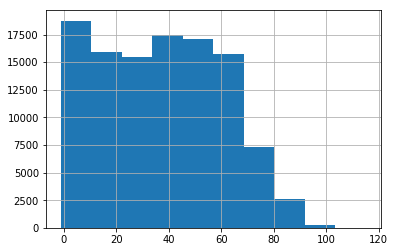

In [31]:
df['Age'].hist()

Store the target variable and the independant variables into *y* and *X*

In [32]:
y = df['No-show']
X = df.drop(columns=['No-show'])

## Missing data

I this section, we'll use sci-kit learn to deal with missing values

In [33]:
from sklearn import impute

Because of the data exploration of before, we know that some *Age* values are equal to -1. Let's see an approach to deal with it.

In [34]:
checkmissing = impute.MissingIndicator(missing_values=-1)
M = checkmissing.fit_transform(X)
print(M)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


The 'M' variable represents how many of the values are missing values. In this case, there's just one column, the *Age* one.

In [35]:
import numpy as np
np.sum(M)

1

In [38]:
imputer = impute.SimpleImputer(missing_values=-1)
X = imputer.fit_transform(X)

Other problem to deal with are the categorical variables. By themselves, don't provide meaningful content for the model. That's why we can use the *preprocessing* module, One-Hot-Encoding in concrete, to convert them. Those are, in our case, in the eight and ninth columns.

In [39]:
from sklearn import preprocessing

In [41]:
onehot = preprocessing.OneHotEncoder(categorical_features=[8, 9], sparse=False)

In [42]:
X.shape

(110527, 10)

In [43]:
onehot.fit(X)
X = onehot.transform(X)

C:\Users\festevem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\festevem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [44]:
X.shape

(110527, 17)

## Normalization

In order to normalize the data, one way is to use the MinMaxScaler of the preprocessing module.

In [45]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [47]:
print(scaler.min_)
print(scaler.data_range_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1. 115.   1.   1.   1.
   1.   4.   1.]


## Data split

The data must be splitted into training and test sets. By default, the ratio (that we'll keep) is 75%-25%.

In [48]:
from sklearn import model_selection

In [49]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y)

Because of the naive approach making the split, we may lost the imbalance of our dataset. To show this, let's check the mean of our depandant variable *y*.

In [50]:
np.mean(y == 'No')

0.798067440534892

By adding the stratify argument, we ensure that the final split of the dataset is going to respect the initial distribution of the target variable.

In [51]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, stratify=y)

## Training

Always start with a simple approach and then increase the model's complexity. For example, let's start with the simpler approach possible, like a model that always outputs the most frequent value ('No'). Even this solution scores a 79.8 % accuracy.

In [55]:
from sklearn import dummy

dummy_class = dummy.DummyClassifier(strategy='most_frequent')
dummy_class.fit(Xtrain, ytrain)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [56]:
dummy_class.score(Xtest, ytest)

0.7980602200347423

From this point, we can begin to explore more complex solutions.

In [58]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(Xtrain, ytrain).score(Xtest, ytest)

0.7651273885350318

As it's shown, a more complex solution yields a worse accuracy than the simplest one. The metrics module can help us to figure out why the model has performed poorly.

In [ ]:
from sklearn import metrics

In [64]:
print(metrics.classification_report(ytest, knn.predict(Xtest)))

              precision    recall  f1-score   support

          No       0.80      0.93      0.86     22052
         Yes       0.28      0.11      0.16      5580

   micro avg       0.77      0.77      0.77     27632
   macro avg       0.54      0.52      0.51     27632
weighted avg       0.70      0.77      0.72     27632



In [65]:
print(metrics.confusion_matrix(ytest, knn.predict(Xtest)))

[[20540  1512]
 [ 4978   602]]


## Hyperparameter optimization

There are plenty of options to perform hyperparameter optimization in scikit learn. Let's see some examples.

In [66]:
params = {'n_neighbors': [1, 5, 25]}

In [69]:
gridsearch = model_selection.GridSearchCV(knn, params, cv=3, verbose=2)
# cv: Specifies the type of Cross Validation eployed
# verbose: Makes plots explaining the trining process

In [70]:
gridsearch.fit(Xtrain, ytrain)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=  24.9s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.5s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=  23.4s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=  29.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=  25.1s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=  25.7s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=  25.1s
[CV] n_neighbors=25 ..................................................
[CV] ................................... n_neighbors=25, total=  26.6s
[CV] n_neighbors=25 ..................................................
[CV] ................................... n_neighbors=25, total=  26.9s
[CV] n_neighbors=25 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.7min finished


KeyboardInterrupt: 

## Pipelines

An scikit learn pipeline is a sequence of operations made to the data in order to optimize the whole project. The only parameter of the *Pipeline* is a single list, with the name of the operation and the object to be run itself.

In [71]:
from sklearn import pipeline, decomposition

In [72]:
pip = pipeline.Pipeline([
    ('norm', preprocessing.MinMaxScaler()), 
    ('pca', decomposition.PCA()), 
    ('knn', neighbors.KNeighborsClassifier())
])

In [73]:
pip.fit(Xtrain, ytrain).score(Xtest, ytest)

0.7630645628257093

Now, let's specify a little bit more the search of hyperparameters. Here, with a double underscore, you can let it know which components to change in a particular distribution fashion.

In [75]:
from scipy import stats

In [76]:
params = {
    'pca__n_components': stats.randint(1, 15), 
    'knn__n_neighbors': stats.randint(1, 50)
}

In [77]:
randomsearch = model_selection.RandomizedSearchCV(
    pip, 
    params, 
    n_iter=10, 
    cv=3, 
    verbose=2
)

In [78]:
randomsearch.fit(Xtrain, ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] knn__n_neighbors=23, pca__n_components=9 ........................
[CV] ......... knn__n_neighbors=23, pca__n_components=9, total=   1.1s
[CV] knn__n_neighbors=23, pca__n_components=9 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ......... knn__n_neighbors=23, pca__n_components=9, total=   1.0s
[CV] knn__n_neighbors=23, pca__n_components=9 ........................
[CV] ......... knn__n_neighbors=23, pca__n_components=9, total=   1.0s
[CV] knn__n_neighbors=37, pca__n_components=11 .......................
[CV] ........ knn__n_neighbors=37, pca__n_components=11, total=   1.5s
[CV] knn__n_neighbors=37, pca__n_components=11 .......................
[CV] ........ knn__n_neighbors=37, pca__n_components=11, total=   1.4s
[CV] knn__n_neighbors=37, pca__n_components=11 .......................
[CV] ........ knn__n_neighbors=37, pca__n_components=11, total=   1.5s
[CV] knn__n_neighbors=7, pca__n_components=12 ........................
[CV] ......... knn__n_neighbors=7, pca__n_components=12, total=   1.1s
[CV] knn__n_neighbors=7, pca__n_components=12 ........................
[CV] ......... knn__n_neighbors=7, pca__n_components=12, total=   1.0s
[CV] knn__n_neighbors=7, pca__n_components=12 ........................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('norm', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'pca__n_components': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023E9059C780>, 'knn__n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023E8FE15630>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [80]:
randomsearch.score(Xtest, ytest)

0.7967573827446439

In [81]:
randomsearch.best_params_

{'knn__n_neighbors': 37, 'pca__n_components': 11}

In [82]:
params = {
    'pca__n_components': [1, 5, 25], 
    'norm': [preprocessing.MinMaxScaler(), preprocessing.RobustScaler()]
}